Decison tree Ml Algo Implementation on Breast Cancer Dataset.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer(as_frame=True)

In [6]:
# splitting dataset into depnedent and independent features
x=df.data
y=df.target

Dataset is already clean and preprocessed.

In [8]:
# splitting dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [9]:
# now standardizing the dataset for better classification
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model1 is without hyperparamter tunning all the parameters are default.

In [14]:
# now creating the model
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()

In [15]:
# doing Cross validation for better results
from sklearn.model_selection import cross_val_score
score=cross_val_score(model1,x_train,y_train,cv=5)
print("Cross-validation scores:", score)
print("Mean CV Accuracy:", np.mean(score))

Cross-validation scores: [0.93506494 0.88157895 0.90789474 0.90789474 0.92105263]
Mean CV Accuracy: 0.9106971975393028


In [16]:
# now fitting the model on training data
model1.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
# now predicting for test data
y_pred1=model1.predict(x_test)

In [20]:
# now checking the accuracy and other metrics for model.
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy Score :-",accuracy_score(y_test,y_pred1))
print("\nClassification Report :-\n",classification_report(y_test,y_pred1))
print("\nConfusion Matrix :-\n",confusion_matrix(y_test,y_pred1))

Accuracy Score :- 0.9148936170212766

Classification Report :-
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        67
           1       0.94      0.93      0.93       121

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.92      0.91      0.92       188


Confusion Matrix :-
 [[ 60   7]
 [  9 112]]


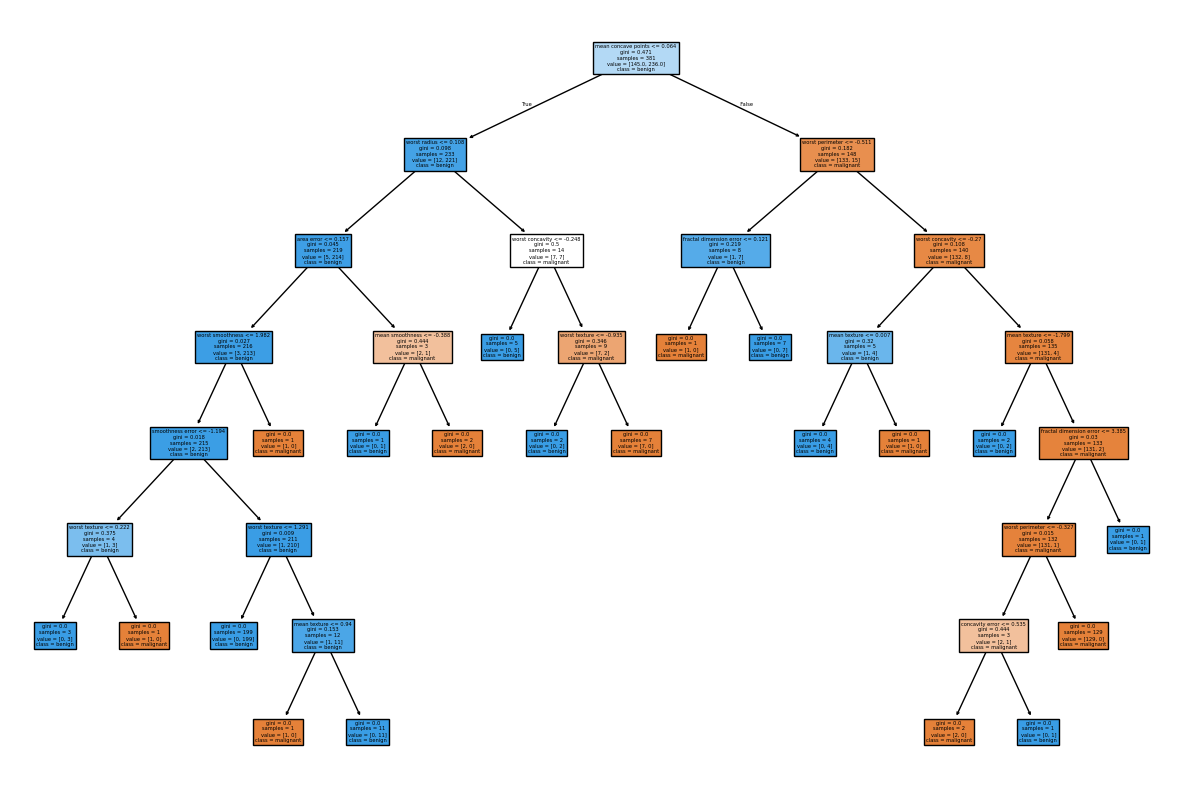

In [24]:
# now visulaizing the tree for model1
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model1,feature_names=x.columns, class_names=df.target_names,filled=True)
plt.show()

model2 is hyperparameter tunned

In [25]:
# impoting gridsearch cv for hyperparamter tunning.
from sklearn.model_selection import GridSearchCV
param={
    "criterion":["gini","entropy"],
    "max_depth":[2,4,6,8,10,None],
    "min_samples_split":[2,5,10,20],
    "min_samples_leaf":[1,2,4,6,8]
}


In [ ]:
model2=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=param,scoring="accuracy",n_jobs=-1,verbose=1,cv=5)

In [29]:
# fitting the model on trained data for best params 
model2.fit(x_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [30]:
# best paramters for model
print("Best Parameters :-",model2.best_params_)
print("Best CV Score :-",model2.best_score_)

Best Parameters :- {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Score :- 0.9264866712235132


In [31]:
# now using best params for test data on model
model2_final=model2.best_estimator_

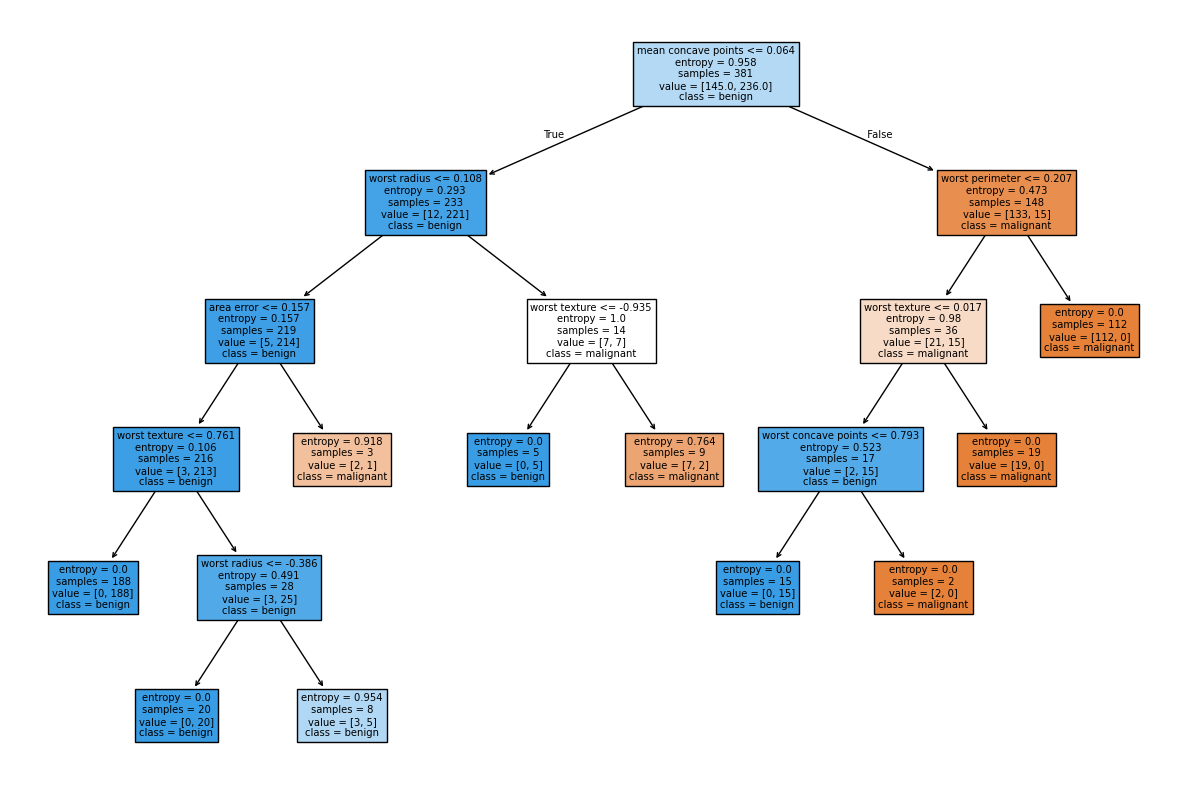

In [33]:
# visualizing the tree for model2
plt.figure(figsize=(15,10))
tree.plot_tree(model2_final,feature_names=x.columns, class_names=df.target_names,filled=True)
plt.show()

In [32]:
# now predicting for test data
y_pred_2=model2_final.predict(x_test)

In [34]:
# now checking for accuracy score and other metrics for new model
print("Accuracy Score :-",accuracy_score(y_test,y_pred_2))
print("\nClassification Report :-",classification_report(y_test,y_pred_2))
print("\nConfusion Matrix :-\n",confusion_matrix(y_test,y_pred_2))

Accuracy Score :- 0.9680851063829787

Classification Report :-               precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.97      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188


Confusion Matrix :-
 [[ 63   4]
 [  2 119]]


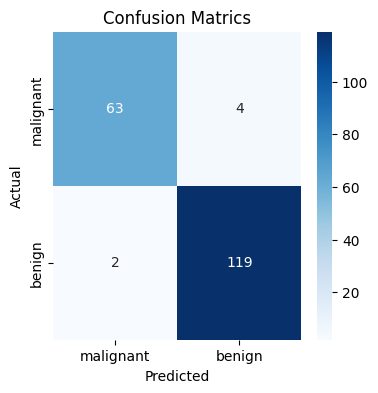

In [36]:
# now lets visualize the confusion matrix for our model better understanding
cm=confusion_matrix(y_test,y_pred_2)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',
            xticklabels=df.target_names,
            yticklabels=df.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrics")
plt.show()

As we can see for hyperparamter tunned model the accuracy is better than the default parameter model 
model1 accuracy= 91%
model2 accuracy=97%